In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from models import Model

/Users/kseniablokhina/Library/Caches/pypoetry/virtualenvs/tsf-ss25-timegpt-vRbsAJxS-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.10.18 (main, Jul  1 2025, 11:02:31) [Clang 17.0.0 (clang-1700.0.13.5)].


In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
df = pd.read_csv('../../transformed_data/cleaned_egg_sales.csv')
df['ts'] = pd.to_datetime(df['ts'])
df.rename(columns={"egg_sales": "y"}, inplace=True)
# Remove or impute zero or extreme outliers
df = df[df['y'] > 1]  # or fillna(method='ffill')
print("Length of the df: ", len(df))

Length of the df:  10574


529


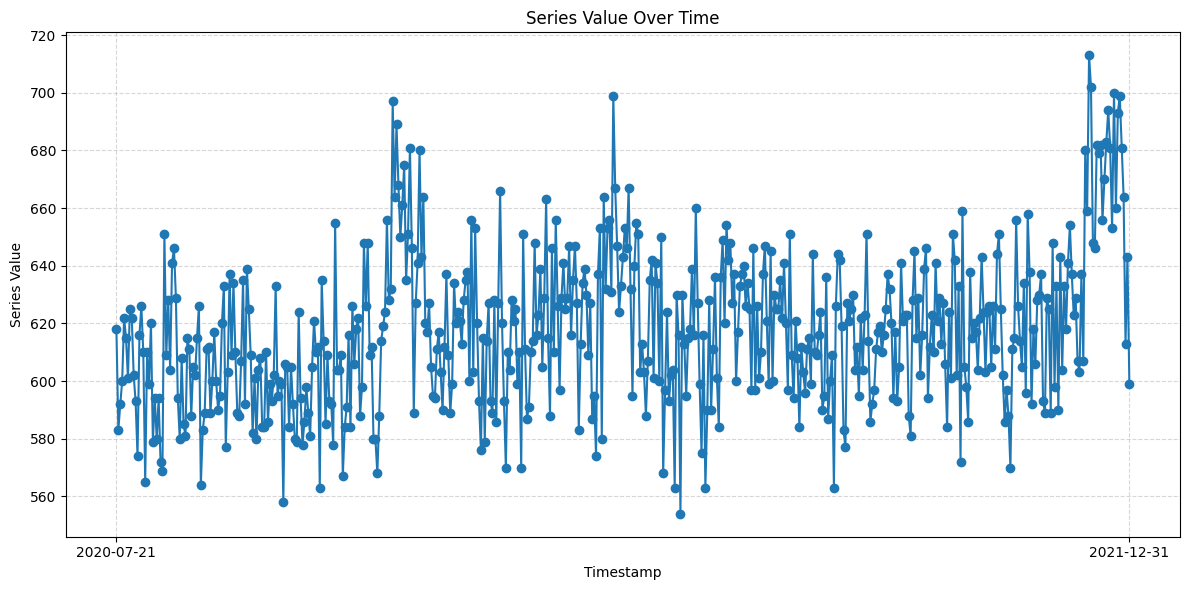

In [4]:
df_short = df[-int(len(df) * 0.05):]
print(len(df_short))

start = df_short['ts'].min()
end = df_short['ts'].max()


plt.figure(figsize=(12, 6))
plt.plot(df_short['ts'], df_short['y'], marker='o')

# Start and End-Ticks
plt.xticks([start, end], [start.strftime('%Y-%m-%d'), end.strftime('%Y-%m-%d')])

plt.xlabel('Timestamp')
plt.ylabel('Series Value')
plt.title('Series Value Over Time')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [23]:
size = 2000 # length of the training dataset

df_recent = df.tail(size).copy()
train_ratio = 0.8
split_idx   = int(len(df_recent) * train_ratio)

df_train = df_recent.iloc[:split_idx].copy().reset_index(drop=True)
df_test  = df_recent.iloc[split_idx:].copy().reset_index(drop=True)

df_recent.head()

,ts,y
8574,2016-06-23,523
8575,2016-06-24,496
8576,2016-06-25,514
8577,2016-06-26,536
8578,2016-06-27,537


In [6]:
print("Duplicates:", df.duplicated().sum())
print("NaNs:\n", df.isna().sum())
print("Frequency check:", df.diff().dropna().value_counts().head())

Duplicates: 0
NaNs:
 ts    0
y     0
dtype: int64
Frequency check: ts      y    
1 days   0.0     162
         4.0     162
        -6.0     160
         10.0    159
         8.0     153
Name: count, dtype: int64


In [27]:
model = Model(df=df_recent)

# Baseline

In [8]:
baseline = model.base_line()

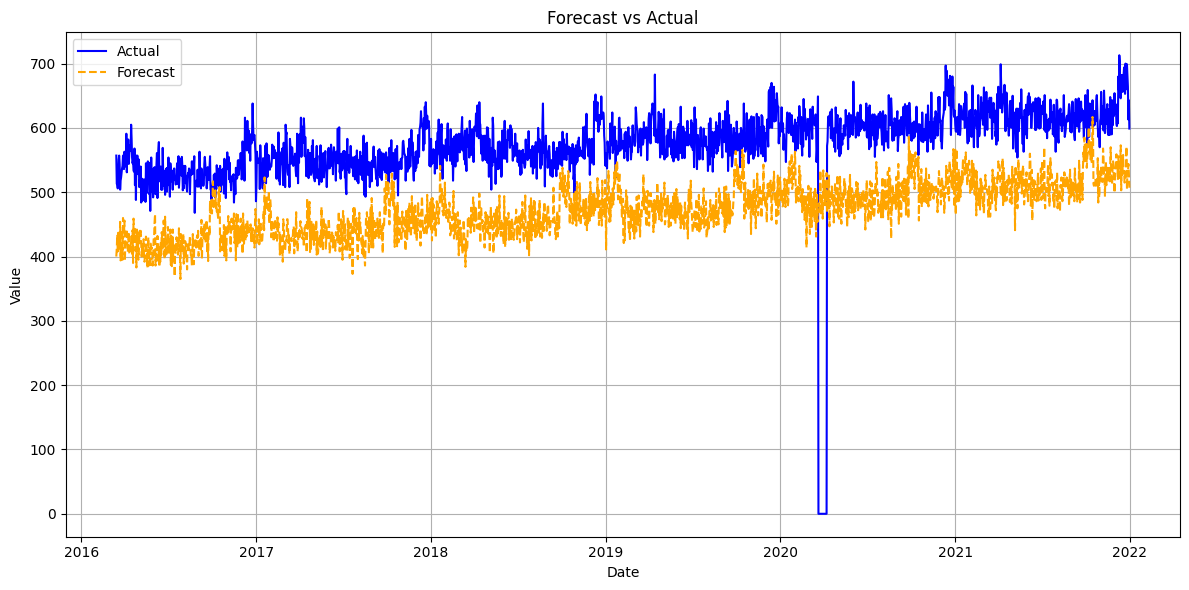

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_test['ts'], df_test['y'], label='Actual', color='blue')
plt.plot(baseline['ts'], baseline['yhat'], label='Forecast', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# LSTM

In [31]:
lstm_model = model.predict_future(steps=24, look_back=24)

/Users/kseniablokhina/Library/Caches/pypoetry/virtualenvs/tsf-ss25-timegpt-vRbsAJxS-py3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [10]:
lstm_model

,ts,prediction
0,2022-01-01,637.807434
1,2022-01-02,641.395142
2,2022-01-03,643.297302
3,2022-01-04,645.353088
4,2022-01-05,646.844604
5,2022-01-06,648.064636
6,2022-01-07,649.339417
7,2022-01-08,650.752441
8,2022-01-09,652.644836
9,2022-01-10,654.333008


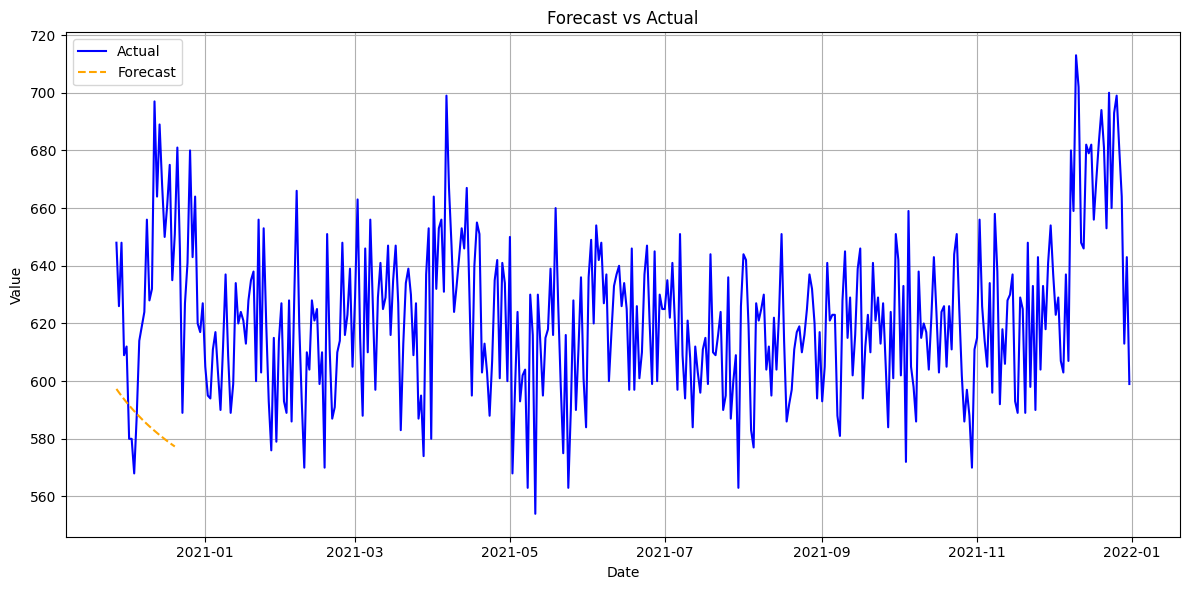

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_test['ts'], df_test['y'], label='Actual', color='blue')
plt.plot(lstm_model['ts'], lstm_model['yhat'], label='Forecast', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
lstm_mae = mean_absolute_error(df_test['y'][:-1], lstm_model["yhat"])
lstm_mae

33.54598648295975

# TimeFM

In [30]:
timefm = model.times_fm("H", use_positional_embedding=True)
#num_layers=20, checkpoint="google/timesfm-1.0-200m-pytorch" 1888 -H

Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 71575.15it/s]
INFO:root:Loading checkpoint from /Users/kseniablokhina/.cache/huggingface/hub/models--google--timesfm-2.0-500m-pytorch/snapshots/dc2443792ce5516872b89b37cf1bc058c3bf0c10/torch_model.ckpt
INFO:root:Sending checkpoint to device cpu
INFO:root:Preprocessing dataframe.


Processing dataframe with multiple processes.
 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.10.18 (main, Jul  1 2025, 11:02:31) [Clang 17.0.0 (clang-1700.0.13.5)].
Finished preprocessing dataframe.


INFO:root:Finished creating output dataframe.


Finished forecasting.


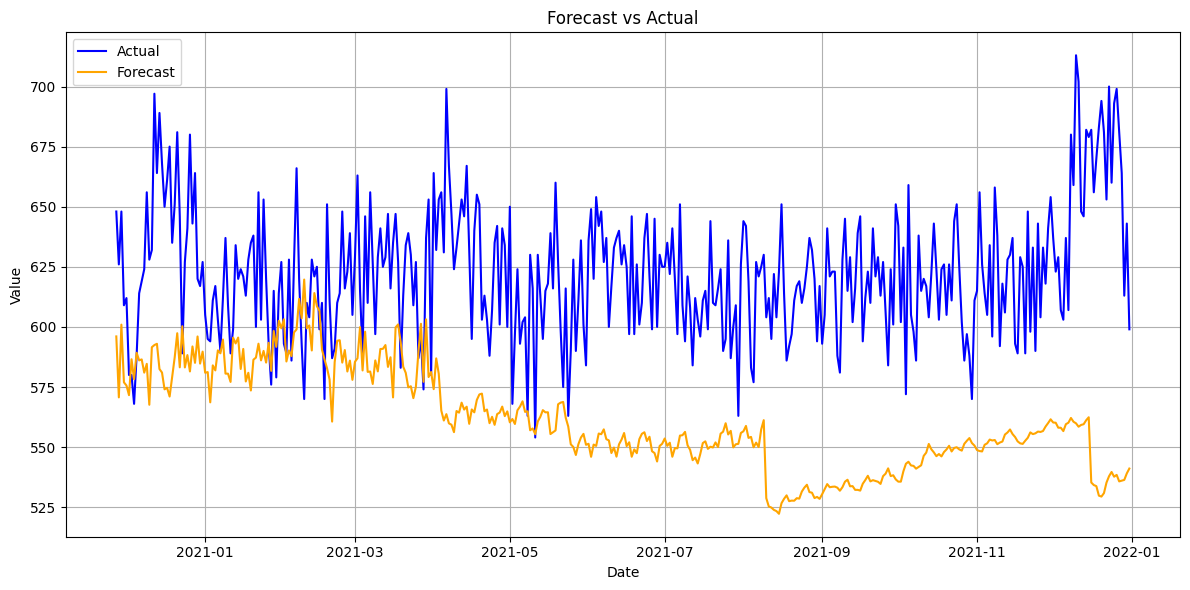

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(df_test['ts'], df_test['y'], label='Actual', color='blue')
plt.plot(timefm['ts'], timefm["yhat"], label='Forecast', color='orange')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [69]:
timesfm_mae = mean_absolute_error(df_test['y'], timefm["yhat"])
timesfm_mae

66.76849365234375